# Machine Learning Lab 1

## Assignment 2 (Deadline : 4/12/2022 11:59PM)

Total Points : 100

Your answers must be entered in LMS by midnight of the day it is due. 

If the question requires a textual response, you can create a PDF and upload that. 

The PDF might be generated from MS-WORD, LATEX, the image of a hand- written response, or using any other mechanism. 

Code must be uploaded and may require demonstration to the TA. 

Numbers in the parentheses indicate points allocated to the question. 

**Naming Convention**: FirstName_LastName_Lab2_TLP23.ipynb

# Question 1 (50 points)

## 1. Read the data into a numpy array

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Read data from file: 'data.csv'. 
# Note that the first row has the number of inputs and number of outputs specified.
# For your reference: you can use "np.loadtxt".
data = np.loadtxt('data.csv', delimiter=',', skiprows=1)
data

array([[  51.87,   79.72, 1249.99],
       [ -30.66,  -15.64, -516.61],
       [ -57.57,   94.22,  312.09],
       ...,
       [ -18.6 ,   32.61,  -45.14],
       [ -38.31,   77.81,  -20.13],
       [ -38.33,   45.69, -460.47]])

## 2. Plot and explore the data to get a better understanding

In [3]:
data_df = pd.DataFrame(data)
data_df.head()

,0,1,2
0,51.87,79.72,1249.99
1,-30.66,-15.64,-516.61
2,-57.57,94.22,312.09
3,-122.10,5.15,-1544.90
4,-53.45,41.87,-201.57


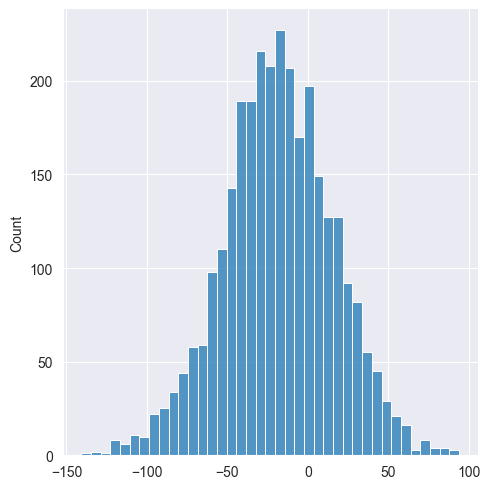

In [4]:
# EDA
#sns.FacetGrid()
sns.displot(data[:,0])

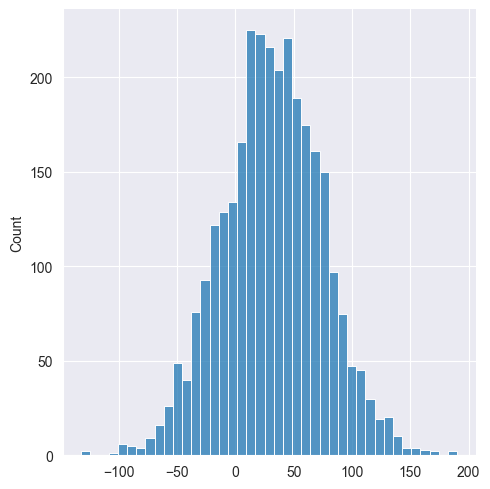

In [5]:
sns.displot(data[:,1])

<AxesSubplot:>

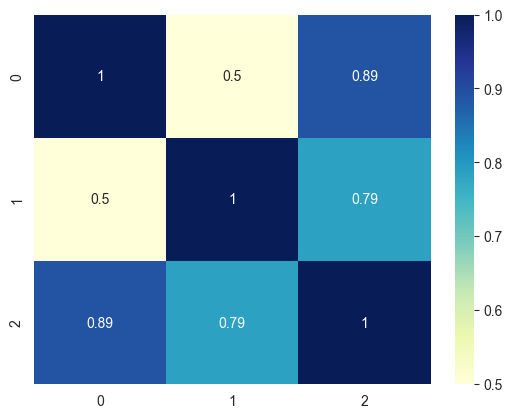

In [6]:
sns.heatmap(data_df.corr(), cmap="YlGnBu", annot=True)

## 3. Prepare the data for modelling

In [7]:
# Separate the data: input and output.

In [8]:
# Perform a train-val-test split of 60-20-20.
# Use "random_state=42".
from sklearn.model_selection import train_test_split


X_train_val, X_test, y_train_val, y_test = train_test_split(data[:,:-1], data[:,-1], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

 * From your understanding of the dataset, is stratified sampling necessary in this case? Why / Why not? <br><br>
<i>Answer: </i>As per my understanding, we do not need stratified sampling in this case because the data is evenly distributed and there are not many visible outliers (as evident from the histplot above)

## 4. Modelling

### 4.1 Linear Regression

In [9]:
# Implement Linear Regression.
# Use both train and val data for training purpose.
# Make preditions on both training(train+val) and test data.
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
model_linear.coef_

array([12.73284297,  7.10235207])

In [10]:
from sklearn.metrics import mean_squared_error

y_pred = model_linear.predict(X_test)
print(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))
model_linear.score(X_test, y_test)

148.51376984258394


0.9513675321883363

### 4.2 Ridge Reegression

In [11]:
# Implement Ridge Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
from sklearn.linear_model import Ridge

alphas = np.logspace(-5,5, 101)
scores_ridge = []
errors_ridge = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    scores_ridge.append(model.score(X_val, y_val))
    errors_ridge.append(np.sqrt(mean_squared_error(y_true=y_val, y_pred= model.predict(X_val))))

print(np.argmax(scores_ridge), np.argmin(errors_ridge))
print(alphas[np.argmax(scores_ridge)], max(scores_ridge))

90 90
10000.0 0.9446310194027773


In [12]:
model_ridge_final = Ridge(alpha=alphas[np.argmax(scores_ridge)])
model_ridge_final.fit(X_train_val, y_train_val)
model_ridge_final.score(X_test, y_test)

0.951374777384595

### 4.3 Lasso Regression

In [13]:
# Implement Lasso Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
from sklearn.linear_model import Lasso
alphas = np.logspace(-5,5, 101)
scores_lasso = []
errors_lasso = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    scores_lasso.append(model.score(X_val, y_val))
    errors_lasso.append(np.sqrt(mean_squared_error(y_true=y_val, y_pred= model.predict(X_val))))

print(np.argmax(scores_lasso), np.argmin(errors_lasso))
print(alphas[np.argmax(scores_lasso)], max(scores_lasso))

70 70
100.0 0.9446424980318713


In [14]:
model_lasso_final = Lasso(alpha=alphas[np.argmax(scores_lasso)])
model_lasso_final.fit(X_train_val, y_train_val)
model_lasso_final.score(X_test, y_test)

0.9514023644195737

### 4.4 ElasticNet Regression

In [2]:
# Implement ElasticNet Regression.
# Perform cross validation to find a good value for your hyper-parameters.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': np.logspace(-5, 5, 11), 'l1_ratio': np.logspace(-5, -1, 11)}
grid_elasticnet_model = GridSearchCV(ElasticNet(), param_grid=parameters)
grid_elasticnet_model.fit(X_train_val, y_train_val)

NameError: name 'np' is not defined

In [16]:
grid_elasticnet_model.best_params_['alpha']

1e-05

In [17]:
best_alpha, best_l1_ratio = grid_elasticnet_model.best_params_['alpha'], grid_elasticnet_model.best_params_['l1_ratio']
model_elastic_final = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
model_elastic_final.fit(X_train_val, y_train_val)
model_elastic_final.score(X_test, y_test)

0.9513936533821384

## 5. Analysis

In [18]:
# Write down the actual value along with the preditions from all the regression models, for the first 10 points in test data.
def print_predictions(label1, label2, model_name, y_pred, y_true):
    print(model_name)
    print(label1, '_________________________', label2)
    for i,j in list(zip(y_pred, y_true)):
        print(i, '        |        ', j)
    print()


print_predictions('Y_pred', 'Y_true', 'Linear', model_linear.predict(X_test[:10]), y_test[:10])
print_predictions('Y_pred', 'Y_true', 'Ridge', model_ridge_final.predict(X_test[:10]), y_test[:10])

Linear
Y_pred _________________________ Y_true
62.229063549126806         |         66.12
-577.0922133260448         |         -572.89
-111.95518554702412         |         -94.71
-412.87624349891786         |         -306.84
603.5401341468327         |         580.1
-18.728490805591903         |         -34.05
-172.01181370750726         |         -81.37
602.6830673277927         |         552.6
-42.223017798748025         |         -24.39
559.9179315894578         |         538.47

Ridge
Y_pred _________________________ Y_true
61.17805680066497         |         66.12
-576.6715469798254         |         -572.89
-112.62417005329553         |         -94.71
-412.09614940002314         |         -306.84
599.9897955099202         |         580.1
-19.32151310785416         |         -34.05
-172.00579580808284         |         -81.37
599.4981483185506         |         552.6
-43.54511809753688         |         -24.39
557.1467852421458         |         538.47



In [19]:
print_predictions('Y_pred', 'Y_true', 'Lasso', model_lasso_final.predict(X_test[:10]), y_test[:10])
print_predictions('Y_pred', 'Y_true', 'ElasticNet', model_elastic_final.predict(X_test[:10]), y_test[:10])

Lasso
Y_pred _________________________ Y_true
60.92609738233004         |         66.12
-574.3438670127006         |         -572.89
-112.15028211276508         |         -94.71
-411.32747538538894         |         -306.84
599.0770840164985         |         580.1
-19.576987466098938         |         -34.05
-171.94203776378853         |         -81.37
598.1471058455872         |         552.6
-42.75381843091256         |         -24.39
555.584997533293         |         538.47

ElasticNet
Y_pred _________________________ Y_true
61.23562977940931         |         66.12
-576.4740026186645         |         -572.89
-112.48928338602805         |         -94.71
-413.46016736397536         |         -306.84
602.5216068176142         |         580.1
-19.80815136309308         |         -34.05
-172.96819474776422         |         -81.37
601.2782534559232         |         552.6
-42.40641978881626         |         -24.39
558.2839020844817         |         538.47



In [20]:
# Find both RMSE and MAE for all the regression models on both training(train+val) and testing data.
from sklearn.metrics import mean_absolute_error, mean_squared_error
print_predictions('RMSE', 'MAE', 'Linear', np.sqrt([mean_squared_error(model_linear.predict(X_test), y_test)]), [mean_absolute_error(model_linear.predict(X_test), y_test)])
print_predictions('RMSE', 'MAE', 'Ridge', np.sqrt([mean_squared_error(model_ridge_final.predict(X_test), y_test)]), [mean_absolute_error(model_ridge_final.predict(X_test), y_test)])
print_predictions('RMSE', 'MAE', 'Lasso', np.sqrt([mean_squared_error(model_lasso_final.predict(X_test), y_test)]), [mean_absolute_error(model_lasso_final.predict(X_test), y_test)])
print_predictions('RMSE', 'MAE', 'ElasticNet', np.sqrt([mean_squared_error(model_elastic_final.predict(X_test), y_test)]), [mean_absolute_error(model_elastic_final.predict(X_test), y_test)])

Linear
RMSE _________________________ MAE
148.51376984258394         |         118.7666325852712

Ridge
RMSE _________________________ MAE
148.50270674485625         |         118.77835282188443

Lasso
RMSE _________________________ MAE
148.46057500362826         |         118.71735411119259

ElasticNet
RMSE _________________________ MAE
148.47388005091386         |         118.72866521848829



## 6. Final Observations
Write down your final conclusions and observations

# Question 2 (30 points)

Given the automobile dataset at https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv , 

## 1. Load and examine the dataset

<b><i>Assuming we need to predict city-mpg</i></b>

In [21]:
data_auto_original = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')

In [22]:
data_auto = data_auto_original.copy()
data_auto.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [23]:
# Count no of columns with NA values
print(data_auto.columns[data_auto.isna().sum() > 0])
print(data_auto.isna().sum()[['stroke','horsepower-binned']])

Index(['stroke', 'horsepower-binned'], dtype='object')
stroke               4
horsepower-binned    1
dtype: int64


In [24]:
# Since only 5 data values have empty columns, we can remove them
data_auto.dropna(inplace=True)
print(data_auto.columns[data_auto.isna().sum() > 0])

Index([], dtype='object')


In [25]:
data_auto['city-L/100km']

0      11.190476
1      11.190476
2      12.368421
3       9.791667
4      13.055556
         ...    
196    10.217391
197    12.368421
198    13.055556
199     9.038462
200    12.368421
Name: city-L/100km, Length: 196, dtype: float64

In [26]:
data_auto.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [27]:
# Dropping other columns that are directly related to mpg column
data_auto.drop(['highway-mpg', 'city-L/100km'], axis=1, inplace=True)
data_auto.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'price', 'horsepower-binned',
       'diesel', 'gas'],
      dtype='object')

In [28]:
print(data_auto['diesel'].value_counts(), data_auto['gas'].value_counts())

# Since diesel and gas data are linearly dependent, we can remove it (As it affects the LR model)
data_auto.drop(['gas'], axis=1, inplace=True)

print(data_auto.columns)

0    176
1     20
Name: diesel, dtype: int64 1    176
0     20
Name: gas, dtype: int64
Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'price', 'horsepower-binned',
       'diesel'],
      dtype='object')


In [29]:
data_auto.shape

(196, 26)

In [30]:
data_auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          196 non-null    int64  
 1   normalized-losses  196 non-null    int64  
 2   make               196 non-null    object 
 3   aspiration         196 non-null    object 
 4   num-of-doors       196 non-null    object 
 5   body-style         196 non-null    object 
 6   drive-wheels       196 non-null    object 
 7   engine-location    196 non-null    object 
 8   wheel-base         196 non-null    float64
 9   length             196 non-null    float64
 10  width              196 non-null    float64
 11  height             196 non-null    float64
 12  curb-weight        196 non-null    int64  
 13  engine-type        196 non-null    object 
 14  num-of-cylinders   196 non-null    object 
 15  engine-size        196 non-null    int64  
 16  fuel-system        196 non

## 2. Visualise/Plot the regression model

In [41]:
print(data_auto[data_auto['city-mpg']>40])

data_auto.drop([17,29,87], axis=0,inplace=True)

    symboling  normalized-losses       make aspiration num-of-doors  \
17          2                121  chevrolet        std          two   
29          2                137      honda        std          two   
87          1                128     nissan        std          two   

   body-style drive-wheels engine-location  wheel-base    length  ...  \
17  hatchback          fwd           front        88.4  0.678039  ...   
29  hatchback          fwd           front        86.6  0.694858  ...   
87      sedan          fwd           front        94.5  0.794330  ...   

    fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
17         2bbl  2.91    3.03               9.5   0.382893    5100.0       47   
29         1bbl  2.91    3.41               9.6   0.313486    4800.0       49   
87          idi  2.99    3.47              21.9   0.332871    4800.0       45   

       price  horsepower-binned  diesel  
17  0.842232                Low       0  
29  0.805762 

## 3. Generate a Linear Regression equation

In [45]:
X_train_q2, X_test_q2, y_train_q2, y_test_q2 = train_test_split(new_df.loc[:, new_df.columns != 'city-mpg'], new_df['city-mpg'], test_size=0.2, random_state=42)

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#q2_model_linear = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
q2_model_linear = LinearRegression()
q2_model_linear.fit(X_train_q2, y_train_q2)

LinearRegression()

## 4. Use a residual plot to inspect if LR fits the model

## 5. Use R2 and MSE to determine the accuracy of the LR fit 

# Question 3 (20 points)

### In this assignment, you will experiment with a toy dataset – the Iris dataset.

## 1. Load the Iris dataset.

In [33]:
# use -  sklearn.datasets.load_iris
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [34]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [35]:
iris_df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
iris_df['target'] = iris_data['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2. The Iris data has 3 classes. For the purpose of this assignment, you will modify it such that it has two classes – specifically, you will merge the “setosa” and “versicolor” classes.

In [36]:
iris_df['target'] = iris_df['target'].apply(lambda x:0 if x==1 else x)

## 3. Construct a training set and a testing set using 80-20 split using random sampling.

In [37]:
X_q3_rnd_train, X_q3_rnd_test, y_q3_rnd_train, y_q3_rnd_test = train_test_split(iris_df.loc[:, iris_df.columns != 'target'], iris_df['target'], test_size=0.2, random_state=42)

## 4. Use Logistic Regression as a black box classifier and assess the performance.

In [40]:
from sklearn.linear_model import LogisticRegressionCV
model_q3_rnd = LogisticRegressionCV()
model_q3_rnd.fit(X_q3_rnd_train, y_q3_rnd_train)
model_q3_rnd.score(X_q3_rnd_test, y_q3_rnd_test)

1.0

## 5. Implement stratified sampling, again using the 80-20 split. Decide the stratification variable and explain your choice.

<AxesSubplot:xlabel='target', ylabel='sepal length (cm)'>

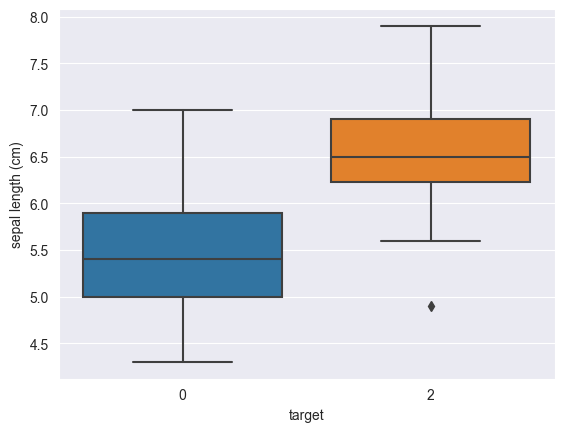

In [13]:
sns.boxplot(iris_df, y='sepal length (cm)', x='target')

<AxesSubplot:xlabel='target', ylabel='sepal width (cm)'>

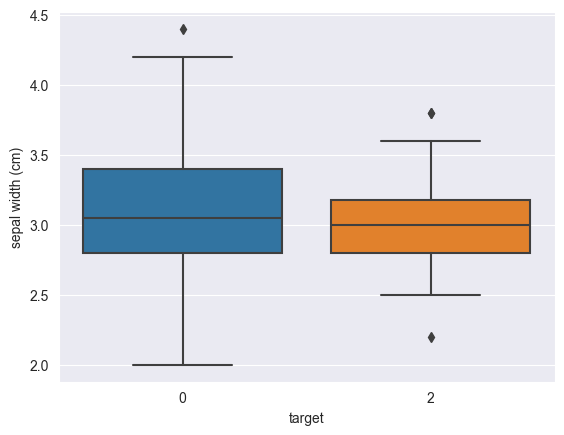

In [14]:
sns.boxplot(iris_df, y='sepal width (cm)', x='target')

<AxesSubplot:xlabel='target', ylabel='petal length (cm)'>

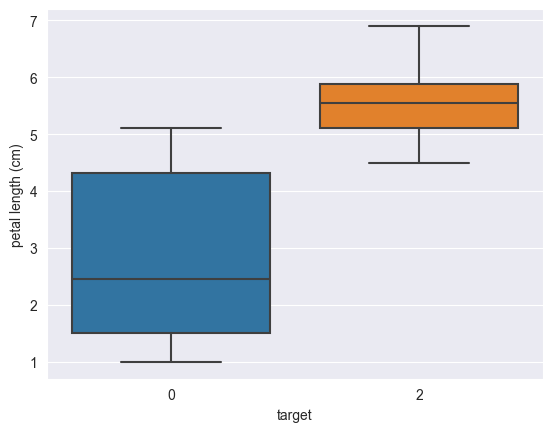

In [15]:
sns.boxplot(iris_df, y='petal length (cm)', x='target')

<AxesSubplot:xlabel='target', ylabel='petal width (cm)'>

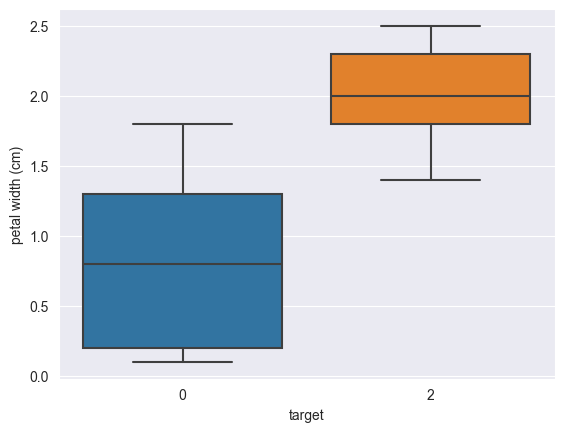

In [16]:
sns.boxplot(iris_df, y='petal width (cm)', x='target')

In [46]:
X_q3_str_train, X_q3_str_test, y_q3_str_train, y_q3_str_test = train_test_split(iris_df.loc[:, iris_df.columns != 'target'], iris_df['target'], test_size=0.2, stratify=iris_df['target'], random_state=42)

## 6. Re-assess the performance. Comment on any changes from the random sampling case. If there is no significant change, comment on why or why not?

In [47]:
from sklearn.linear_model import LogisticRegressionCV
model_q3_str = LogisticRegressionCV()
model_q3_str.fit(X_q3_rnd_train, y_q3_rnd_train)
model_q3_str.score(X_q3_rnd_test, y_q3_rnd_test)

1.0

Both the models are equally good and give 100% accuracy. This is probably because after merging 2 classes we find that the data is very clearly linearly seperable and this is evident in the wide range observed in the boxplots of the 2 classes. Thus, stratified sampling does improve the results in this case.